In [1]:
!pip install -r requirements.txt

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)

/var/folders/gr/htls9_1d35n657q516khzk_c0000gn/T/ipykernel_5227/2559577920.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
import matplotlib as mpl
from matplotlib import rc
import matplotlib.font_manager as fm

# sns.set(style="whitegrid")
# sns.set_color_codes("muted")

rc('font', family=['AppleGothic'])
plt.rcParams['axes.unicode_minus'] = False

In [6]:
df = pd.read_csv('./datasets/lyrics_by_year_1964_2023.csv')
df = df[~df.lyric.isna()]
df

,id,year,title,singer,lyric,x_rated
2,5758967,1964,물새우는 해변,권혜경,고요한 밤하늘에 별이 잠들고\n밀리는 파도소리 나혼자 들으며\n외로히 홀로 날으는 ...,False
3,4083218,1964,내일또 만납시다,금호동,하루의 일을 끝내고 돌아가는\n거리엔 사람의 물결\n하늘엔 별이 하나 둘 반짝이면\...,False
4,3622464,1964,밀짚모자 목장아가씨,박재란,시원한 밀짚모자\n포플라 그늘에\n양떼를 몰고가는\n목장의 아가씨\n연분홍 빛 입술...,False
5,3621978,1964,아빠 안녕,현미,비가 나리네 비가 나리네\n돌아선 이가슴에\n그님은 어데 그어느곳에\n이마음 벗사려...,False
6,2517558,1964,빗속의 여인 1964년작,Add 4 신중현,잊지 못할 빗속의 여인\n지금은 어데 있나\n\n노오란 레인코트에\n검은 눈동자 잊...,False
...,...,...,...,...,...,...
4661,31343875,2023,첫사랑,백아,알아 내 맘에 조용히\n문을 두드리면\n눈에 뿌옇게 고여버린\n널 흘려보내야 해\n...,False
4662,30962526,2023,모든 날 모든 순간 Every day Every Moment,폴킴,네가 없이 웃을 수 있을까\n생각만 해도 눈물이나\n힘든 시간 날 지켜준 사람\n이...,False
4663,30244931,2023,봄날,방탄소년단,보고 싶다\n이렇게 말하니까 더 보고 싶다\n너희 사진을 보고 있어도\n보고 싶다\...,False
4664,4446485,2023,너의 모든 순간,성시경,이윽고 내가 한눈에\n너를 알아봤을 때\n모든 건 분명 달라지고 있었어\n내 세상은...,False


In [100]:
df[df.singer.str.contains("장범준")]

,id,year,title,singer,lyric,x_rated
3915,8104509,2016,사랑에 빠졌죠 당신만이,장범준,사랑에 빠졌죠 사랑에 빠져 버렸죠\n당신만이 나를 빠져들게 만들죠\n당신만이 나를 ...,False
4178,32003395,2019,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,흔들리는 꽃들 속에서\n네 샴푸향이 느껴진거야\n스쳐지나간건가 뒤돌아보지만\n그냥 ...,False
4214,31684636,2019,노래방에서,장범준,나는 사랑이\n어떻게 이뤄지는 지 연구 했지\n여러가지 상황의 수를 계산 해 봤지\...,False
4215,31684634,2019,당신과는 천천히,장범준,퇴근 시간 전에는\n시간이 너무 느리게 가는데\n왜 집에만 오면 시간이 너무 빨라서...,False
4346,32003395,2020,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,흔들리는 꽃들 속에서\n네 샴푸향이 느껴진거야\n스쳐지나간건가 뒤돌아보지만\n그냥 ...,False
4418,33013877,2021,잠이 오질 않네요,장범준,당신은 날 설레게 만들어\n조용한 내 마음 자꾸만 춤추게 해\n얼마나 얼마나 날 떨...,False
4450,32003395,2021,흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야,장범준,흔들리는 꽃들 속에서\n네 샴푸향이 느껴진거야\n스쳐지나간건가 뒤돌아보지만\n그냥 ...,False


In [8]:
def cleanize(t) -> str:
    t = re.sub('[^a-zA-Zㄱ-ㅎㅏ-ㅣ가-힣]', ' ', t)
    return re.sub('[\s]{2,}', ' ', t).lower()

def to_corpus(s) -> list:
    return list(map(cleanize, s.split('\n')))
  
def get_tfidf_matrix(corpus: list) -> scipy.sparse._csr.csr_matrix:
    tfidfv = TfidfVectorizer().fit(corpus)
    return tfidfv.transform(corpus)

def get_tfidf_mean(corpus: list) -> np.ndarray:
    return np.array(get_tfidf_matrix(corpus).mean(axis=0)).flatten()

def get_tfidf_mean_nonzero(corpus: list) -> np.ndarray:
    mat = get_tfidf_matrix(corpus)
    return np.array([m.sum() / m.count_nonzero() for m in mat.transpose()])
  
def get_top_k(a: np.ndarray, k) -> np.ndarray:
    if k >= len(a): return a
    return a[np.argpartition(a, -k)[-k:]]

In [9]:
from collections import Counter


def normalize(v):
    return np.array(v, dtype=np.float32) / np.linalg.norm(v)

def split_sentence(s):
    l = "" if type(s) != str else s
    l = cleanize(l).strip().lower()
    return l.split()

def get_repeatability_type2(lyric):
    a = split_sentence(lyric)
    n = len(a)
    if n == 0: return 0
    if n == 1: return 1
    c = Counter(a)
    # 집합 A에서 w_i가 등장할 확률 * A-{w_i} 에서 w_i가 다시 등장할 확률 (겹칠 확률)
    return np.mean([v/n*(v-1)/(n-1) for v in c.values()])

def get_repeatability_type3(lyric):
    # 단어가 중복되어 등장할 확률 * 가사 길이
    return get_repeatability_type2(lyric) * len(lyric)

In [ ]:
df_lyrics = df[~df['lyric'].isna()].copy()

In [152]:
df.reset_index()

,year,id,most_count,length
0,1964,1.914230e+06,4.300000,50.250000
1,1965,2.015015e+06,4.200000,52.400000
2,1966,2.742573e+06,4.750000,55.750000
3,1967,1.474114e+06,5.057143,58.371429
4,1968,2.421093e+06,4.384615,54.692308
5,1969,1.119138e+06,6.833333,64.933333
6,1970,2.132236e+06,6.050000,59.100000
7,1971,1.734274e+06,7.423077,61.000000
8,1972,2.356764e+06,6.615385,63.256410
9,1973,1.162496e+06,7.542857,78.628571


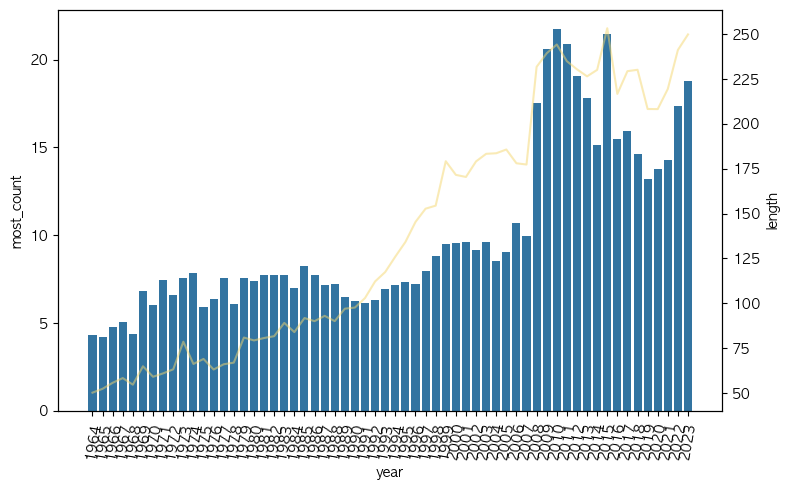

In [262]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = plt.gca().twinx()

def count_top1(l: list) -> float:
    c = Counter(l)
    m = np.mean([v for k, v in c.most_common(1)])
    return m

df_lyrics_by_counter = df_lyrics.copy()
sentences = df_lyrics['lyric'].apply(split_sentence)
df_lyrics_by_counter['most_count'] = sentences.apply(count_top1)
df_lyrics_by_counter['length'] = sentences.apply(len)
df = df_lyrics_by_counter.select_dtypes([int, float]).groupby('year').mean()
ax1.set_xticklabels(labels=df.index, rotation=80)


sns.barplot(data=df, x='year', y='most_count', ax=ax1)
sns.lineplot(data=df, x=ax1.get_xticks(), y='length', alpha=0.5, color='#F5D76E')

plt.tight_layout()
plt.show()

x_most_count = df_lyrics_by_counter['most_count']
x_length = df_lyrics_by_counter['length']

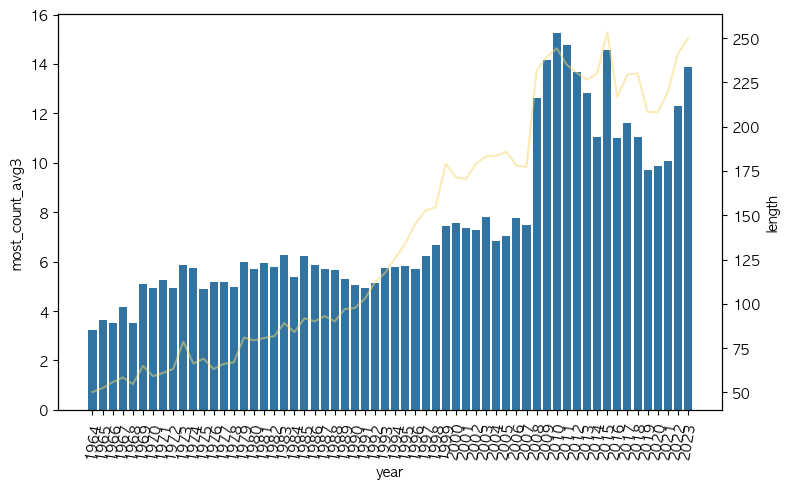

In [263]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = plt.gca().twinx()

def count_avg_top3(l: list) -> float:
    c = Counter(l)
    m = np.mean([v for k, v in c.most_common(3)])
    return m

df_lyrics_by_counter = df_lyrics.copy()
sentences = df_lyrics['lyric'].apply(split_sentence)
df_lyrics_by_counter['most_count_avg3'] = sentences.apply(count_avg_top3)
df_lyrics_by_counter['length'] = sentences.apply(len)
df = df_lyrics_by_counter.select_dtypes([int, float]).groupby('year').mean()
ax1.set_xticklabels(labels=df.index, rotation=80)


sns.barplot(data=df, x='year', y='most_count_avg3', ax=ax1)
sns.lineplot(data=df, x=ax1.get_xticks(), y='length', alpha=0.5, color='#F5D76E')

plt.tight_layout()
plt.show()

x_most_count_avg3 = df_lyrics_by_counter['most_count_avg3']

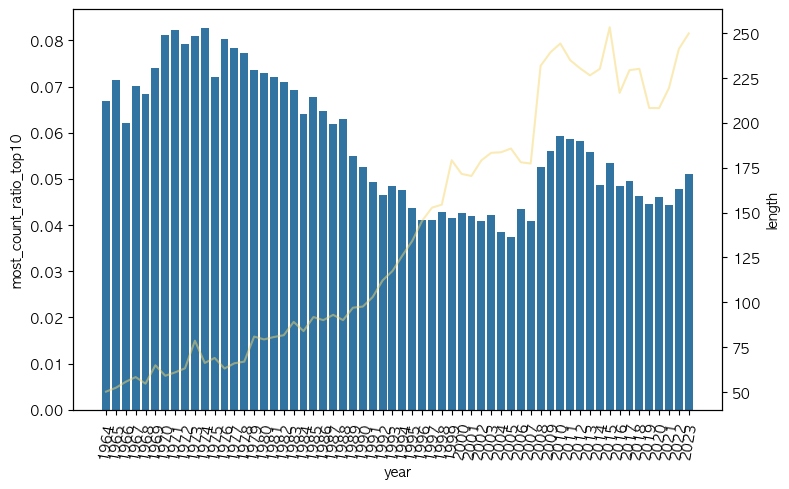

In [250]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = plt.gca().twinx()
df_lyrics_by_counter = df_lyrics.copy()
sentences = df_lyrics['lyric'].apply(split_sentence)

def count_ratio_top10(l: list) -> float:
    c = Counter(l)
    m = np.mean([v for k, v in c.most_common(3)])
    return m / len(l)

df_lyrics_by_counter['most_count_ratio_top10'] = sentences.apply(count_ratio_top10)
df_lyrics_by_counter['length'] = sentences.apply(len)
df = df_lyrics_by_counter.select_dtypes([int, float]).groupby('year').mean()
ax1.set_xticklabels(labels=df.index, rotation=80)


sns.barplot(data=df, x='year', y='most_count_ratio_top10', ax=ax1)
sns.lineplot(data=df, x=ax1.get_xticks(), y='length', alpha=0.5, color='#F5D76E')

plt.tight_layout()
plt.show()

x_most_count_ratio_top10 = df_lyrics_by_counter['most_count_ratio_top10']

In [229]:
def get_repeatability_by_probability(words: list):
    n = len(words)
    if n == 0: return 0
    if n == 1: return 1
    c = Counter(words)
    # 집합 A에서 w_i가 등장할 확률 * A-{w_i} 에서 w_i가 다시 등장할 확률 (겹칠 확률)
    return np.mean([v/n*(v-1)/(n-1) for v in c.values()])

def get_repeatability_by_probability2(words: list):
    # 단어가 중복되어 등장할 확률 * 가사 길이
    return get_repeatability_by_probability(words) * len(words)

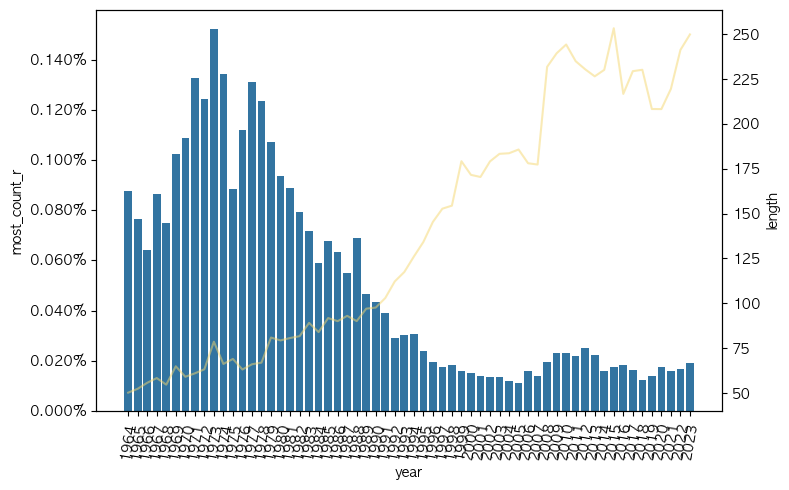

In [234]:
plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = plt.gca().twinx()
df_lyrics_by_counter = df_lyrics.copy()
sentences = df_lyrics['lyric'].apply(split_sentence)
df_lyrics_by_counter['most_count_r'] = sentences.apply(get_repeatability_by_probability)
df_lyrics_by_counter['length'] = sentences.apply(len)
df = df_lyrics_by_counter.select_dtypes([int, float]).groupby('year').mean()
ax1.set_xticklabels(labels=df.index, rotation=80)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))

sns.barplot(data=df, x='year', y='most_count_r', ax=ax1)
sns.lineplot(data=df, x=ax1.get_xticks(), y='length', alpha=0.5, color='#F5D76E')

plt.tight_layout()
plt.show()

x_most_count_ratio = df_lyrics_by_counter['most_count_r']

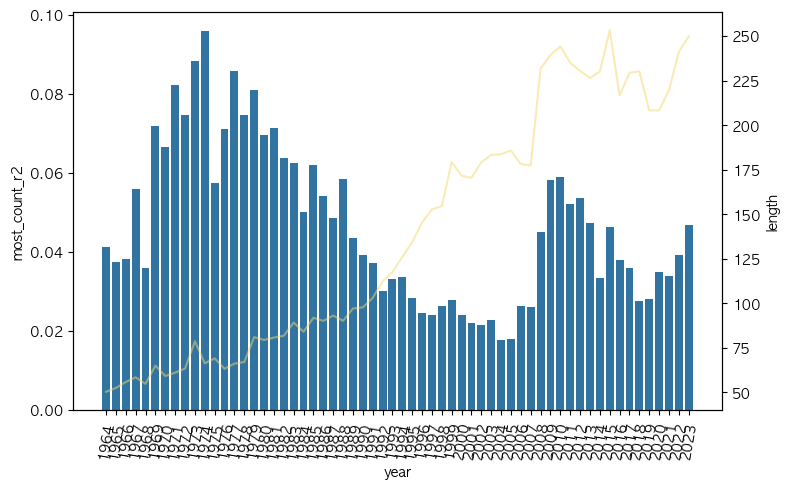

In [237]:
plt.figure(figsize=(8, 5))
ax1 = plt.gca()
ax2 = plt.gca().twinx()
df_lyrics_by_counter = df_lyrics.copy()
sentences = df_lyrics['lyric'].apply(split_sentence)
df_lyrics_by_counter['most_count_r2'] = sentences.apply(get_repeatability_by_probability2)
df_lyrics_by_counter['length'] = sentences.apply(len)
df = df_lyrics_by_counter.select_dtypes([int, float]).groupby('year').mean()
ax1.set_xticklabels(labels=df.index, rotation=80)

sns.barplot(data=df, x='year', y='most_count_r2', ax=ax1)
sns.lineplot(data=df, x=ax1.get_xticks(), y='length', alpha=0.5, color='#F5D76E')

plt.tight_layout()
plt.show()

x_most_count_ratio2 = df_lyrics_by_counter['most_count_r2']

<Axes: >

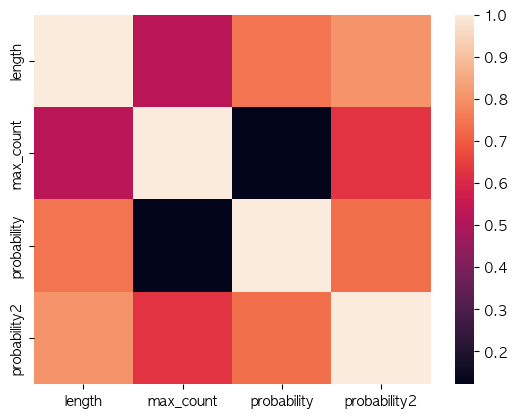

In [276]:
sns.heatmap(pd.DataFrame({
    'length': x_length,
    'max_count': x_most_count,
    # 'max_count_avg3': x_most_count_avg3,
    'probability': x_most_count_ratio,
    'probability2': x_most_count_ratio2,
    'length': x_most_count_ratio_top10,
}).corr())

<Axes: xlabel='length', ylabel='Count'>

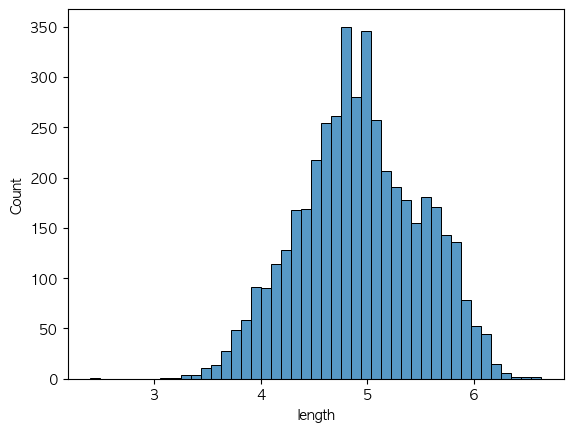

In [269]:
sns.histplot(np.log1p(x_length))

<Axes: xlabel='most_count_r', ylabel='Count'>

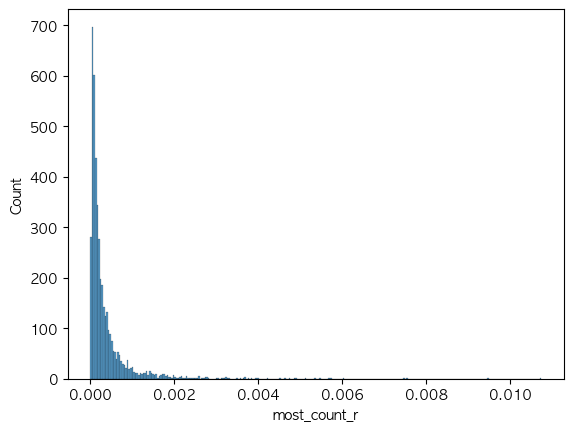

In [274]:
sns.histplot(np.log1p(x_most_count))

In [10]:
cols = []
for lyric in df_lyrics['lyric']:
    corpus = to_corpus(lyric)
    tfidf = get_tfidf_mean(corpus)
    tfidf_nz = get_tfidf_mean_nonzero(corpus)
    repeatability = get_repeatability_type3(lyric)
    cols.append((
        len(lyric),
        tfidf.mean(),
        get_top_k(tfidf, 10).mean(),
        get_top_k(tfidf, 20).mean(),
        get_top_k(tfidf, 30).mean(),
        tfidf_nz.mean(),
        get_top_k(tfidf_nz, 10).mean(),
        get_top_k(tfidf_nz, 20).mean(),
        get_top_k(tfidf_nz, 30).mean(),
        repeatability,
    ))

df_avg_tfidf = pd.DataFrame(cols, columns=[
    "length",
    "avg_tfidf",
    "avg_tfidf_top10",
    "avg_tfidf_top20",
    "avg_tfidf_top30",
    "avg_tfidf_nz",
    "avg_tfidf_nz_top10",
    "avg_tfidf_nz_top20",
    "avg_tfidf_nz_top30",
    "repeatability"
])
df_avg_tfidf.index = df_lyrics.index
df_avg_tfidf

,length,avg_tfidf,avg_tfidf_top10,avg_tfidf_top20,avg_tfidf_top30,avg_tfidf_nz,avg_tfidf_nz_top10,avg_tfidf_nz_top20,avg_tfidf_nz_top30,repeatability
2,144,0.104594,0.108765,0.104594,0.104594,0.470674,0.489443,0.470674,0.470674,0.204836
3,245,0.064941,0.078452,0.068226,0.064941,0.535173,0.584204,0.549235,0.535173,0.160355
4,166,0.061794,0.080910,0.064045,0.061794,0.687763,0.747934,0.698804,0.687763,0.194314
5,123,0.079643,0.097614,0.079643,0.079643,0.607008,0.664969,0.607008,0.607008,0.183793
6,251,0.051716,0.077436,0.057922,0.051716,0.594853,0.682525,0.623600,0.594853,0.431925
...,...,...,...,...,...,...,...,...,...,...
4661,401,0.022449,0.042963,0.035565,0.030058,0.661434,0.892099,0.799603,0.764368,0.040326
4662,406,0.023840,0.050131,0.039531,0.033701,0.540048,0.700256,0.650884,0.624777,0.039253
4663,932,0.011415,0.039778,0.029385,0.025071,0.600331,0.806539,0.762923,0.744318,0.062633
4664,460,0.025033,0.054817,0.044309,0.038837,0.508101,0.683163,0.612578,0.580560,0.035276


In [ ]:
df_lyrics['lyric']

In [11]:
df_with_tfidf = pd.merge(df_lyrics, df_avg_tfidf, left_index=True, right_index=True)
df_with_tfidf.drop(['x_rated', 'lyric', 'id'], axis=1)

,year,title,singer,length,avg_tfidf,avg_tfidf_top10,avg_tfidf_top20,avg_tfidf_top30,avg_tfidf_nz,avg_tfidf_nz_top10,avg_tfidf_nz_top20,avg_tfidf_nz_top30,repeatability
2,1964,물새우는 해변,권혜경,144,0.104594,0.108765,0.104594,0.104594,0.470674,0.489443,0.470674,0.470674,0.204836
3,1964,내일또 만납시다,금호동,245,0.064941,0.078452,0.068226,0.064941,0.535173,0.584204,0.549235,0.535173,0.160355
4,1964,밀짚모자 목장아가씨,박재란,166,0.061794,0.080910,0.064045,0.061794,0.687763,0.747934,0.698804,0.687763,0.194314
5,1964,아빠 안녕,현미,123,0.079643,0.097614,0.079643,0.079643,0.607008,0.664969,0.607008,0.607008,0.183793
6,1964,빗속의 여인 1964년작,Add 4 신중현,251,0.051716,0.077436,0.057922,0.051716,0.594853,0.682525,0.623600,0.594853,0.431925
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,2023,첫사랑,백아,401,0.022449,0.042963,0.035565,0.030058,0.661434,0.892099,0.799603,0.764368,0.040326
4662,2023,모든 날 모든 순간 Every day Every Moment,폴킴,406,0.023840,0.050131,0.039531,0.033701,0.540048,0.700256,0.650884,0.624777,0.039253
4663,2023,봄날,방탄소년단,932,0.011415,0.039778,0.029385,0.025071,0.600331,0.806539,0.762923,0.744318,0.062633
4664,2023,너의 모든 순간,성시경,460,0.025033,0.054817,0.044309,0.038837,0.508101,0.683163,0.612578,0.580560,0.035276


In [12]:
df_with_tfidf_years = df_with_tfidf.select_dtypes([int, float]).groupby('year').mean()
df_with_tfidf_years.head(10)

,id,length,avg_tfidf,avg_tfidf_top10,avg_tfidf_top20,avg_tfidf_top30,avg_tfidf_nz,avg_tfidf_nz_top10,avg_tfidf_nz_top20,avg_tfidf_nz_top30,repeatability
year,,,,,,,,,,,
1964,1.914230e+06,193.400000,0.050403,0.066617,0.054855,0.051345,0.572805,0.646018,0.604005,0.581616,0.161925
1965,2.015015e+06,203.500000,0.047087,0.069011,0.053613,0.049175,0.565038,0.657218,0.609828,0.587813,0.144748
1966,2.742573e+06,220.041667,0.044269,0.063127,0.050874,0.046113,0.559708,0.655686,0.608437,0.581898,0.145576
1967,1.474114e+06,226.657143,0.047599,0.071522,0.054847,0.049105,0.580039,0.667228,0.617608,0.591124,0.218252
1968,2.421093e+06,211.615385,0.049467,0.073931,0.057034,0.051370,0.572945,0.657053,0.612690,0.587442,0.138885
1969,1.119138e+06,244.433333,0.047322,0.069841,0.054760,0.049005,0.589744,0.679402,0.630275,0.604393,0.272878
1970,2.132236e+06,227.950000,0.048249,0.071806,0.054802,0.049496,0.575935,0.673577,0.618324,0.586955,0.259338
1971,1.734274e+06,237.076923,0.049379,0.072263,0.055774,0.050864,0.612063,0.707881,0.649744,0.626087,0.318985
1972,2.356764e+06,240.256410,0.050760,0.074555,0.057882,0.052291,0.602782,0.686031,0.636235,0.613324,0.280051


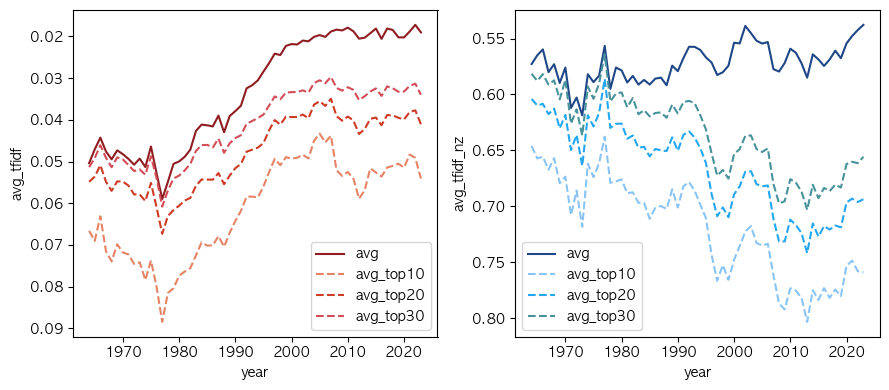

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4))
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf', color='#8F1D21', ax=axes[0], label='avg')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_top10', color='#E68364', linestyle='--', ax=axes[0], label='avg_top10')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_top20', color='#CF3A24', linestyle='--', ax=axes[0], label='avg_top20')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_top30', color='#D24D57', linestyle='--', ax=axes[0], label='avg_top30')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz', color='#1F4788', ax=axes[1], label='avg')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top10', color='#89C4F4', linestyle='--', ax=axes[1], label='avg_top10')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top20', color='#22A7F0', linestyle='--', ax=axes[1], label='avg_top20')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top30', color='#48929B', linestyle='--', ax=axes[1], label='avg_top30')
[ax.invert_yaxis() for ax in axes]
axes[0].legend(loc='lower right')
plt.tight_layout()
plt.show()

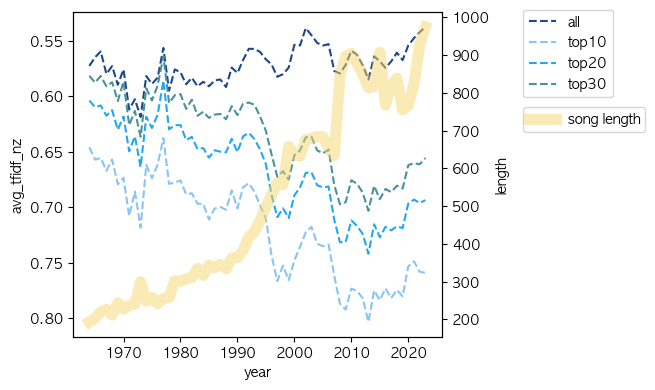

In [14]:
fig = plt.figure(figsize=(7, 4))
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz', color='#1F4788', linestyle='--', label='all')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top10', color='#89C4F4', linestyle='--', label='top10')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top20', color='#22A7F0', linestyle='--', label='top20')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz_top30', color='#48929B', linestyle='--', label='top30')
plt.gca().legend(loc='upper left', bbox_to_anchor=(1.2, 1.03))
plt.gca().invert_yaxis()
ax1 = plt.gca().twinx()
l5 = sns.lineplot(data=df_with_tfidf_years, x='year', y='length', color='#F5D76E', alpha=0.5, linewidth=8, ax=ax1, label='song length')
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 0.73))
plt.tight_layout()
plt.show()

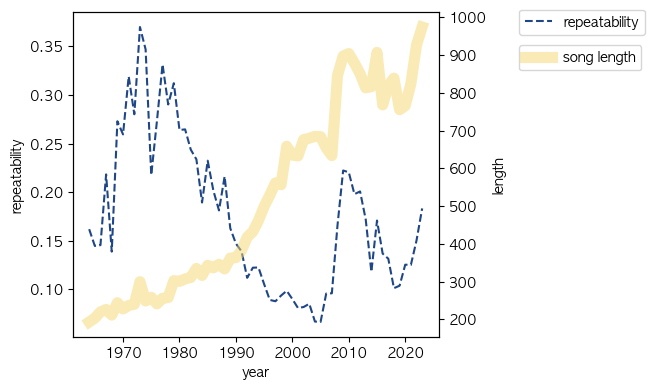

In [15]:
fig = plt.figure(figsize=(7, 4))
sns.lineplot(data=df_with_tfidf_years, x='year', y='repeatability', color='#1F4788', linestyle='--', label='repeatability')
plt.gca().legend(loc='upper left', bbox_to_anchor=(1.2, 1.03))
ax1 = plt.gca().twinx()
l5 = sns.lineplot(data=df_with_tfidf_years, x='year', y='length', color='#F5D76E', alpha=0.5, linewidth=8, ax=ax1, label='song length')
ax1.legend(loc='upper left', bbox_to_anchor=(1.2, 0.92))
plt.tight_layout()
plt.show()

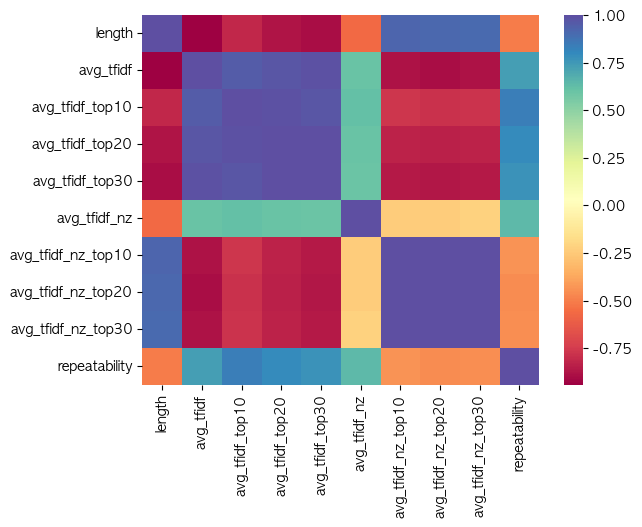

In [16]:
df_corr = df_with_tfidf_years.copy().drop('id', axis=1)
sns.heatmap(data=df_corr.corr(), cmap='Spectral')
plt.show()

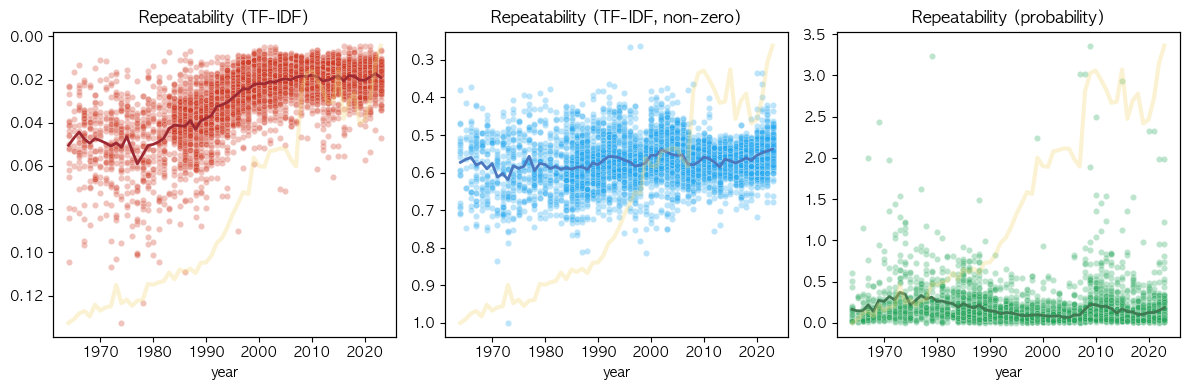

In [81]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

ax1 = axes[0].twinx()
ax1.set_zorder(0)
ax1.get_yaxis().set_visible(False)
sns.lineplot(data=df_with_tfidf_years, x='year', y='length', color='#F5D76E', alpha=0.3, linewidth=3, ax=ax1)
sns.scatterplot(data=df_with_tfidf, x='year', y='avg_tfidf', alpha=0.3, s=20, ax=axes[0], color='#CF3A24')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf', linewidth=2, ax=axes[0], color='#9D2933')
axes[0].set_title('Repeatability (TF-IDF)')
axes[0].invert_yaxis()

ax1 = axes[1].twinx()
ax1.set_zorder(0)
ax1.get_yaxis().set_visible(False)
sns.lineplot(data=df_with_tfidf_years, x='year', y='length', color='#F5D76E', alpha=0.3, linewidth=3, ax=ax1)
sns.scatterplot(data=df_with_tfidf, x='year', y='avg_tfidf_nz', alpha=0.3, s=20, ax=axes[1], color='#22A7F0')
sns.lineplot(data=df_with_tfidf_years, x='year', y='avg_tfidf_nz', linewidth=2, ax=axes[1], color='#4B77BE')
axes[1].set_title('Repeatability (TF-IDF, non-zero)')
axes[1].invert_yaxis()

ax1 = axes[2].twinx()
ax1.set_zorder(0)
ax1.get_yaxis().set_visible(False)
sns.lineplot(data=df_with_tfidf_years, x='year', y='length', color='#F5D76E', alpha=0.3, linewidth=3, ax=ax1)
sns.scatterplot(data=df_with_tfidf, x='year', y='repeatability', alpha=0.3, s=20, ax=axes[2], color='#26A65B')
sns.lineplot(data=df_with_tfidf_years, x='year', y='repeatability', linewidth=2, ax=axes[2], color='#407A52')
axes[2].set_title('Repeatability (probability)')

for ax in axes:
    ax.set_ylabel(None)
plt.tight_layout()
plt.show()

In [83]:
df1_merge = pd.merge(df_avg_tfidf, df_lyrics, how='right', left_index=True, right_index=True)
df1_merge = df1_merge.drop_duplicates('id')
df1_merge['song'] = df1_merge['title'].apply(lambda s: s if len(s) < 5 else (s[:7] + '..')) + \
    ' - ' + df1_merge['singer'].apply(lambda s: s if len(s) < 5 else ('..' + s[-7:]))
df1_merge['song_full'] = df1_merge['song'] + ' (' + df1_merge['year'].astype(str) + ')'

df1_merge.sort_values(by=['avg_tfidf_nz', 'year'])[['id', 'song', 'song_full', 'length', 'avg_tfidf_nz']]

,id,song,song_full,length,avg_tfidf_nz
2073,2184575,PS I Lo.. - 박정현,PS I Lo.. - 박정현 (1998),394,0.262234
1904,71198,작별의식 - 베이시스,작별의식 - 베이시스 (1996),172,0.265839
4266,32998018,힘든 건 사랑.. - 임창정,힘든 건 사랑.. - 임창정 (2020),599,0.333963
3114,1871159,Too Muc.. - ..CROWN J,Too Muc.. - ..CROWN J (2008),1096,0.364350
1472,3403869,애수 - 김완선,애수 - 김완선 (1992),272,0.364481
...,...,...,...,...,...
1162,49012,울고 싶어라.. - ..사랑과 평화,울고 싶어라.. - ..사랑과 평화 (1988),247,0.809180
1027,986730,굿바이 내사랑.. - 이승미,굿바이 내사랑.. - 이승미 (1987),222,0.811290
2230,81920,선택 - 백지영,선택 - 백지영 (1999),396,0.814031
216,1125814,먼데서 오신 .. - 조미미,먼데서 오신 .. - 조미미 (1971),238,0.835602


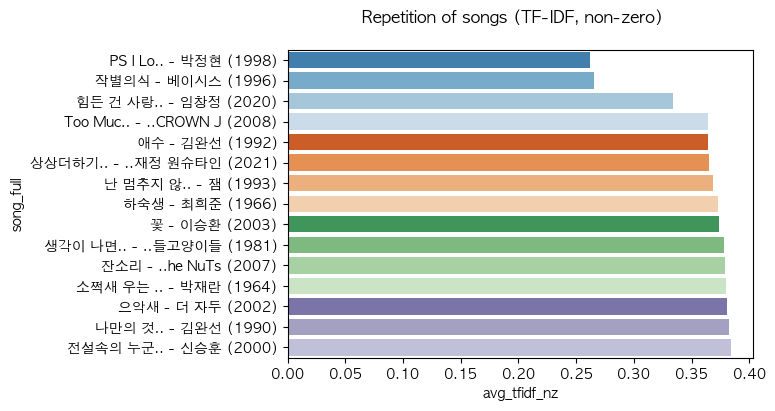

In [18]:
df1 = df1_merge.sort_values(by=['avg_tfidf_nz', 'year'])
plt.figure(figsize=(6, 4))
sns.barplot(data=df1.iloc[:15], x='avg_tfidf_nz', y='song_full', palette='tab20c')
plt.suptitle('Repetition of songs (TF-IDF, non-zero)')
plt.show()

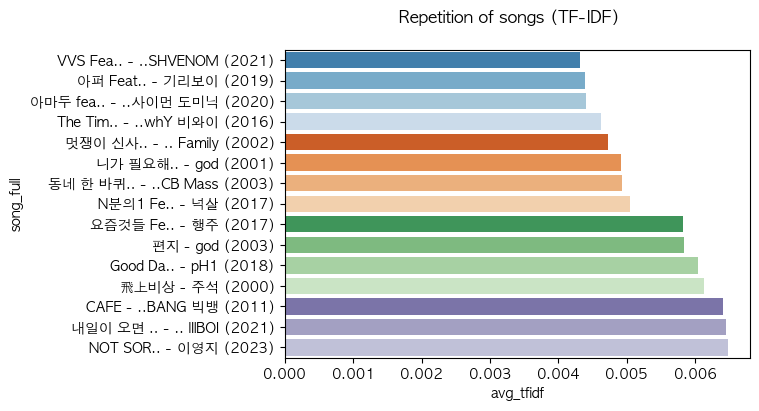

In [19]:
df1 = df1_merge.sort_values(by=['avg_tfidf', 'year'])
plt.figure(figsize=(6, 4))
sns.barplot(data=df1.iloc[:15], x='avg_tfidf', y='song_full', palette='tab20c')
plt.suptitle('Repetition of songs (TF-IDF)')
plt.show()

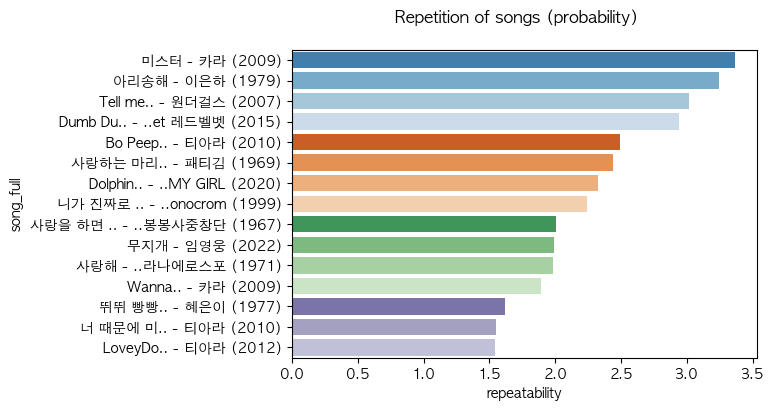

In [20]:
df1 = df1_merge.sort_values(by='repeatability', ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(data=df1.iloc[:15], x='repeatability', y='song_full', palette='tab20c')
plt.suptitle('Repetition of songs (probability)')
plt.show()

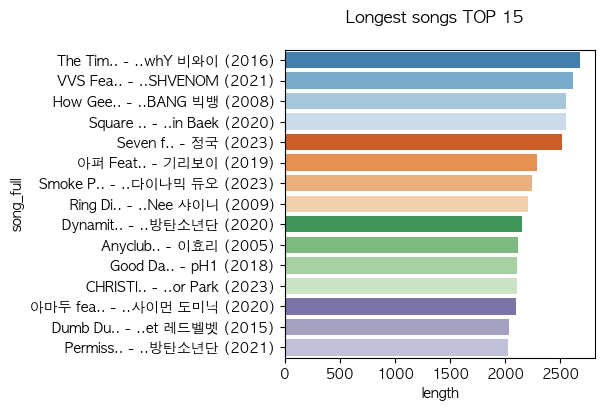

In [86]:
df1 = df1_merge.sort_values(by='length', ascending=False)
plt.figure(figsize=(4, 4))
sns.barplot(data=df1.iloc[:15], x='length', y='song_full', palette='tab20c')
plt.suptitle('Longest songs TOP 15')
plt.show()

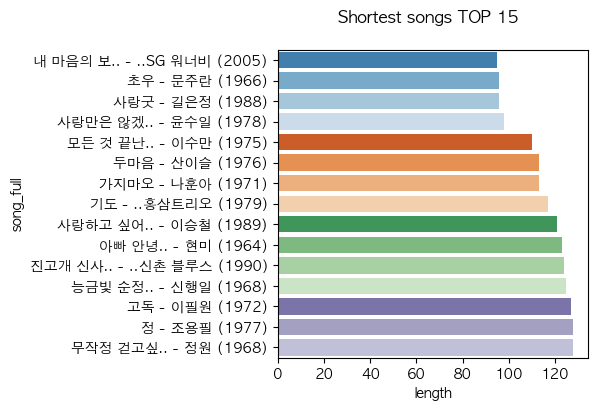

In [87]:
df1 = df1_merge.sort_values(by='length', ascending=True)
plt.figure(figsize=(4, 4))
sns.barplot(data=df1.iloc[:15], x='length', y='song_full', palette='tab20c')
plt.suptitle('Shortest songs TOP 15')
plt.show()

In [96]:
df1_merge.sort_values(by='length', ascending=False).iloc[:3][['id', 'title', 'singer', 'length']]

,id,title,singer,length
3959,5620266,The Time Goes On,BewhY 비와이,2679
4415,33077590,VVS Feat JUSTHIS Prod GroovyRoom,미란이 MIRANI 먼치맨MUNCHMAN Khundi Panda 머쉬베놈 MUSHV...,2616
3152,1786851,How Gee 하우지,BIGBANG 빅뱅,2552


In [99]:
df1_merge.sort_values(by='length', ascending=True).iloc[:4][['id', 'title', 'singer', 'length']]

,id,title,singer,length
2784,926191,내 마음의 보석상자,SG 워너비,95
57,1125291,초우,문주란,96
1141,430551,사랑굿,길은정,96
484,1726836,사랑만은 않겠어요,윤수일,98


In [23]:
df1['year_band'] = df1['year'].apply(lambda y: f"{y // 100:02d}{((y % 100) // 10) * 10:02d}").astype(int)
df1[['id', 'year', 'year_band', 'title', 'singer']]

,id,year,year_band,title,singer
2784,926191,2005,2000,내 마음의 보석상자,SG 워너비
57,1125291,1966,1960,초우,문주란
1141,430551,1988,1980,사랑굿,길은정
484,1726836,1978,1970,사랑만은 않겠어요,윤수일
358,2521468,1975,1970,모든 것 끝난 뒤,이수만
...,...,...,...,...,...
4571,36617841,2023,2020,Seven feat Latto Clean Ver,정국
4328,32243273,2020,2020,Square 2017,백예린 Yerin Baek
3152,1786851,2008,2000,How Gee 하우지,BIGBANG 빅뱅
4415,33077590,2021,2020,VVS Feat JUSTHIS Prod GroovyRoom,미란이 MIRANI 먼치맨MUNCHMAN Khundi Panda 머쉬베놈 MUSHV...


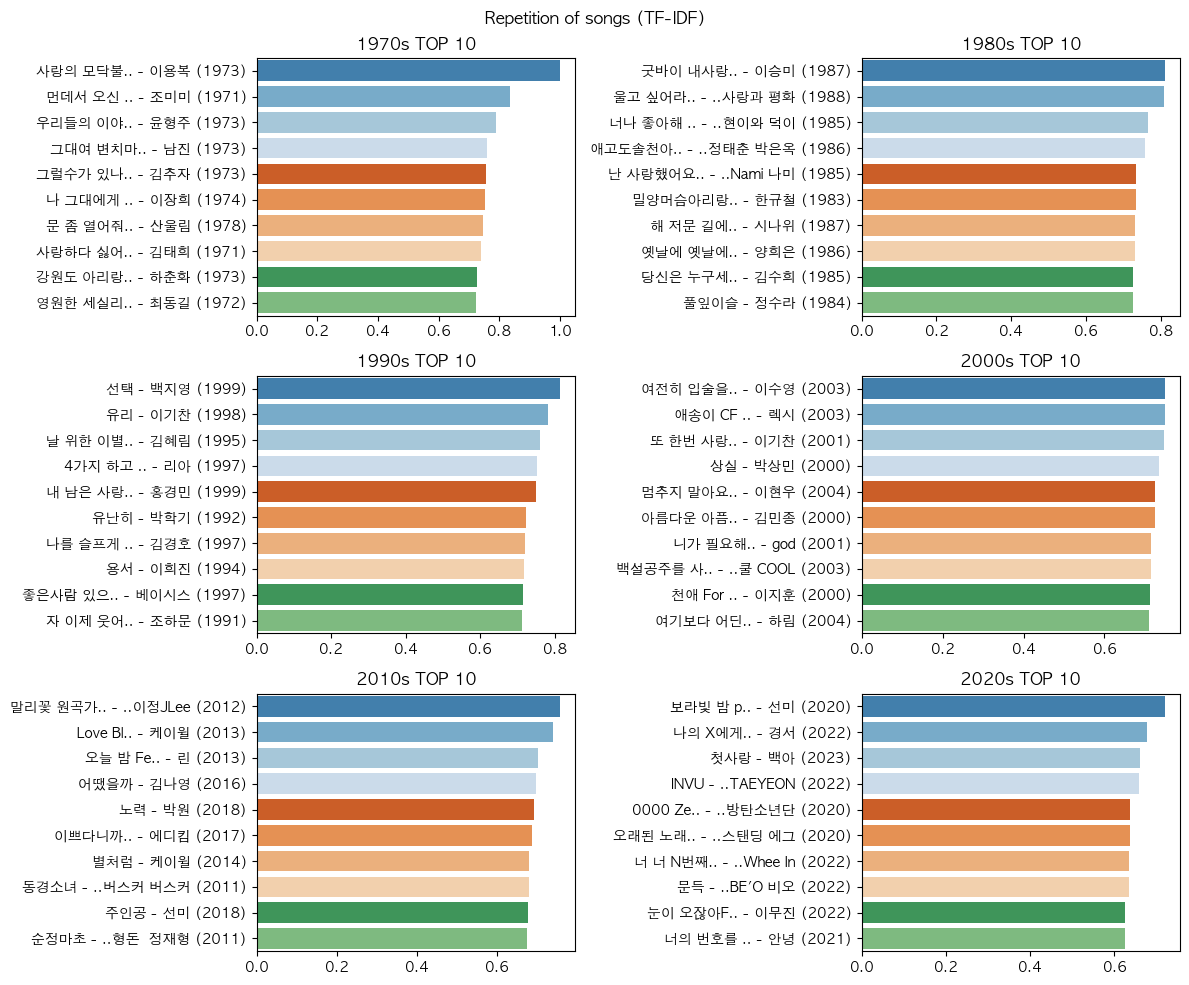

In [28]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
pivot_col = 'avg_tfidf_nz'
for i, yb in enumerate(range(1970, 2020 + 1, 10)):
    df_yb = df1[df1['year_band'] == yb].sort_values(by=pivot_col, ascending=False)
    ax = axes[i // 2, i % 2]
    ax.set_title(f"{yb}s TOP 10")
    sns.barplot(data=df_yb.iloc[:10], x=pivot_col, y='song_full', palette='tab20c', ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.suptitle('Repetition of songs (TF-IDF)')
plt.tight_layout()
plt.show()

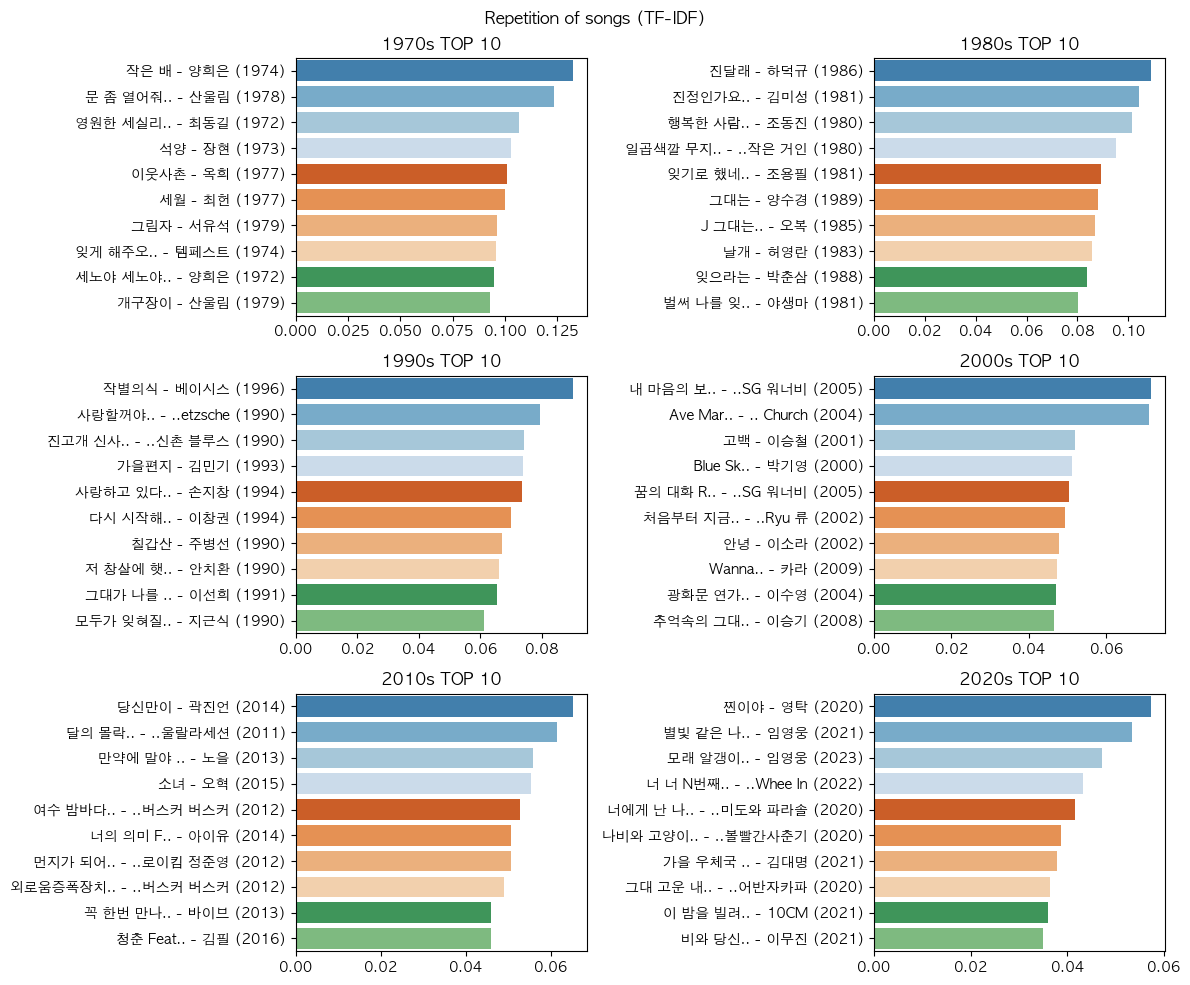

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
pivot_col = 'avg_tfidf'
for i, yb in enumerate(range(1970, 2020 + 1, 10)):
    df_yb = df1[df1['year_band'] == yb].sort_values(by=pivot_col, ascending=False)
    ax = axes[i // 2, i % 2]
    ax.set_title(f"{yb}s TOP 10")
    sns.barplot(data=df_yb.iloc[:10], x=pivot_col, y='song_full', palette='tab20c', ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.suptitle('Repetition of songs (TF-IDF)')
plt.tight_layout()
plt.show()

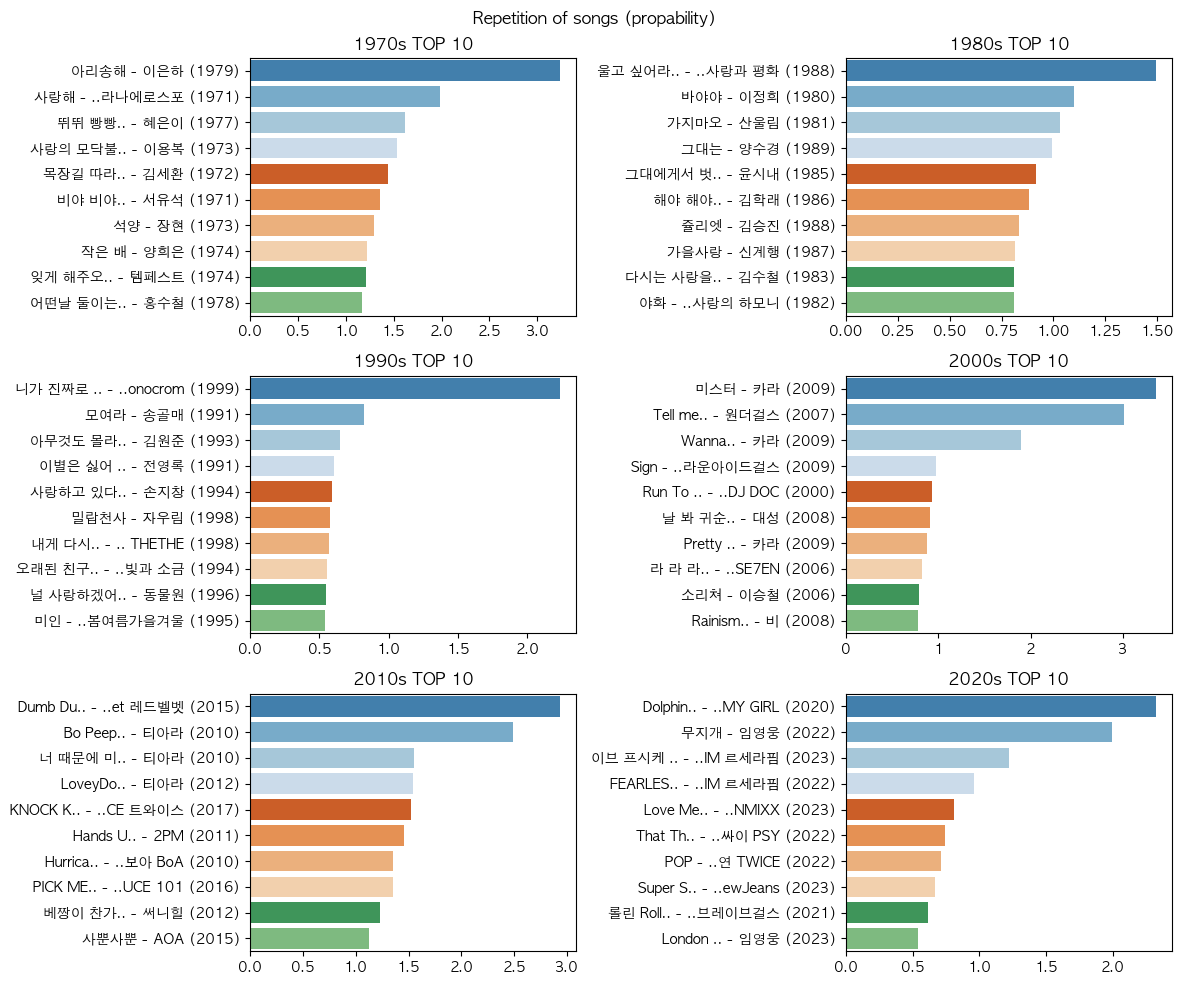

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
pivot_col = 'repeatability'
for i, yb in enumerate(range(1970, 2020 + 1, 10)):
    df_yb = df1[df1['year_band'] == yb].sort_values(by=pivot_col, ascending=False)
    ax = axes[i // 2, i % 2]
    ax.set_title(f"{yb}s TOP 10")
    sns.barplot(data=df_yb.iloc[:10], x=pivot_col, y='song_full', palette='tab20c', ax=ax)
    ax.set_xlabel(None)
    ax.set_ylabel(None)

plt.suptitle('Repetition of songs (propability)')
plt.tight_layout()
plt.show()